In [2]:
UKMapsLink="https://github.com/isabellasilvalazo/ProcesamientoGDF/raw/main/mapas/UKmaps_27700.gpkg"

from  fiona import listlayers


#layers in maps
listlayers(UKMapsLink)

['UK1',
 'airports',
 'small airports hull',
 'UK0',
 'UK',
 'rivers',
 'roads',
 'lakes',
 'gazetter',
 'border0',
 'border']

In [3]:
# reading in the data:

import os
os.environ['USE_PYGEOS'] = '0'

import geopandas as gpd

UK=gpd.read_file(UKMapsLink,layer='UK0')
UKcountries=gpd.read_file(UKMapsLink,layer='UK1')
UKcounties=gpd.read_file(UKMapsLink,layer='UK')
airports=gpd.read_file(UKMapsLink,layer='airports')
rivers=gpd.read_file(UKMapsLink,layer='rivers')
roads=gpd.read_file(UKMapsLink,layer='roads')
lakes=gpd.read_file(UKMapsLink,layer='lakes')
border=gpd.read_file(UKMapsLink,layer='border0')

In [4]:
import pandas as pd 
infoseaports=pd.read_csv(os.path.join("data","UpdatedPub150.csv"))

In [5]:
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [6]:
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3774 non-null   object 
 1   Country Code  3774 non-null   object 
 2   Latitude      3774 non-null   float64
 3   Longitude     3774 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.1+ KB


In [8]:
infoseaports['Country Code'].value_counts()

United States             666
Canada                    262
United Kingdom            185
Japan                     163
Norway                    137
                         ... 
Timor-Leste                 1
Bosnia and Herzegovina      1
Gibraltar                   1
Cook Islands                1
Jordan                      1
Name: Country Code, Length: 196, dtype: int64

In [9]:
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                 geometry=gpd.points_from_xy(infoseaports.Longitude,
                                             infoseaports.Latitude), 
                 crs=4326)# notice it is unprojected

seaports_UK=seaports[seaports['Country Code']=='United Kingdom'].copy()

seaports_UK.reset_index(drop=True, inplace=True)

seaports_UK_27700=seaports_UK.to_crs(27700) # projected crs

<AxesSubplot:>

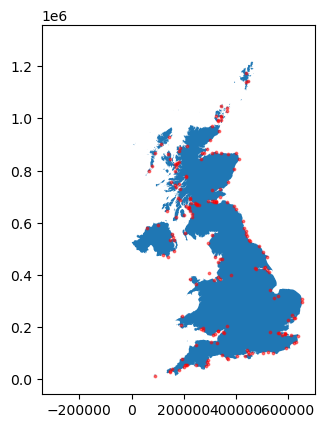

In [16]:
base = UK.plot()
seaports_UK_27700.plot(ax=base, alpha=0.5,markersize=3, color='red')

In [25]:
#Ejercicio 1
seaports_UK_27700

,portName,Country Code,Latitude,Longitude,geometry
0,Bird Port,United Kingdom,51.566667,-2.966667,POINT (333094.344 185753.321)
1,Rothesay Dock,United Kingdom,55.900000,-4.400000,POINT (250041.236 670034.682)
2,Grimsby,United Kingdom,53.583333,-0.066667,POINT (528085.344 411375.653)
3,King's Lynn,United Kingdom,52.750000,0.400000,POINT (562082.983 319632.014)
4,Ayr,United Kingdom,55.466667,-4.633333,POINT (233624.509 622356.398)
...,...,...,...,...,...
180,Warkworth Harbour,United Kingdom,55.333333,-1.583333,POINT (426531.060 604443.607)
181,Watchet Harbor,United Kingdom,51.183333,-3.333333,POINT (306905.311 143523.383)
182,Rothesay Harbor,United Kingdom,55.833333,-5.050000,POINT (209086.379 664220.065)
183,Faslane,United Kingdom,56.063889,-4.819457,POINT (224566.800 689257.021)


In [26]:
airports

,name,country_name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,London Heathrow Airport,United Kingdom,large_airport,51.470600,-0.461941,83.0,England,London,POINT (506926.458 175747.466)
1,London Gatwick Airport,United Kingdom,large_airport,51.148102,-0.190278,202.0,England,London,POINT (526678.502 140316.668)
2,London Stansted Airport,United Kingdom,large_airport,51.884998,0.235000,348.0,England,London,POINT (553918.887 223075.805)
3,Manchester Airport,United Kingdom,large_airport,53.349375,-2.279521,257.0,England,Manchester,POINT (381489.869 383645.942)
4,Edinburgh Airport,United Kingdom,large_airport,55.950145,-3.372288,135.0,Scotland,Edinburgh,POINT (314402.214 673862.868)
...,...,...,...,...,...,...,...,...,...
1377,Worcester-Royal-Hospital Heliport,United Kingdom,heliport,52.189661,-2.177204,233.0,England,Worcester,POINT (387982.881 254616.917)
1378,RAF Wrexham,United Kingdom,closed,53.066667,-2.950278,250.0,Wales,Wrexham,POINT (336420.971 352580.789)
1379,York Racecourse Balloonport,United Kingdom,closed,53.947870,-1.099140,49.0,England,York,POINT (459223.346 450571.936)
1380,RAF Bempton,United Kingdom,closed,54.149900,-0.177800,NaN,England,Yorkshire,POINT (519109.807 474208.891)


In [28]:
airports.kind.value_counts()

small_airport     951
closed            256
medium_airport     82
heliport           80
large_airport       9
balloonport         2
seaplane_base       2
Name: kind, dtype: int64

In [29]:
heliport=airports[airports.kind=='heliport'] 
heliport.reset_index(drop=True, inplace=True)

In [30]:
heliport

,name,country_name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,RNAS Portland Heliport,United Kingdom,heliport,50.568100,-2.449720,NaN,England,Portland,POINT (368246.659 74358.010)
1,Tresco Heliport,United Kingdom,heliport,49.945599,-6.331390,20.0,England,Tresco,POINT (89369.570 14042.608)
2,Weston-super-Mare Heliport,United Kingdom,heliport,51.338900,-2.932600,NaN,England,NaN,POINT (335132.994 160392.136)
3,RAF Boulmer,United Kingdom,heliport,55.421025,-1.600571,77.0,England,Boulmer,POINT (425381.558 614196.298)
4,Morn Farm Helipad (Private),United Kingdom,heliport,50.625175,-2.513042,NaN,England,Chickerell,POINT (363806.078 80733.799)
...,...,...,...,...,...,...,...,...,...
75,Western Isles Hospital Helipad,United Kingdom,heliport,58.221780,-6.381600,NaN,Scotland,Stornoway,POINT (142813.958 934261.217)
76,Nissan Helipad,United Kingdom,heliport,54.908910,-1.483143,NaN,England,Sunderland,POINT (433236.299 557255.117)
77,Torbay Daddyhole Plain,United Kingdom,heliport,50.455712,-3.514665,NaN,England,Torquay,POINT (292573.361 62860.520)
78,Addenbrooke's Hospital Helipad,United Kingdom,heliport,52.170800,0.139700,54.0,England,"Trumpington, Cambridgeshire",POINT (546424.685 254662.147)


In [31]:
#try 1
seaports_UK_27700.geometry.apply\
(lambda g: heliport.geometry.distance(g)/1000)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,116.810105,298.138113,25.442992,438.269682,109.418055,485.867297,162.686853,309.440527,107.752844,160.942323,...,76.525890,1041.798281,128.168597,783.071704,167.845898,772.315153,384.762258,129.400891,224.183543,88.062173
1,607.291709,675.382103,516.697331,184.016721,600.181614,7.750296,610.462768,589.641729,555.529121,555.568092,...,567.643533,588.649162,586.592599,331.791929,352.257990,285.154960,215.127082,608.662011,510.271978,437.721163
2,373.000398,591.899552,316.580693,227.341773,369.204162,372.067758,460.856391,215.104988,282.333754,243.309724,...,355.852295,811.141883,309.140863,711.531996,156.835643,649.494691,174.003331,420.628924,157.782935,210.242720
3,312.620949,562.887961,277.242920,324.738968,310.461090,461.645675,421.590466,120.474119,216.714253,164.165316,...,305.986091,905.774360,238.240342,800.350998,177.946704,744.013154,270.307616,372.245935,66.830127,185.843505
4,564.291907,625.184096,472.985150,191.930594,557.047827,48.776097,562.467134,566.405662,516.863586,521.112583,...,523.692951,639.047280,547.676124,355.785475,316.389458,324.855618,209.959623,562.592752,482.745287,398.821806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,533.280238,679.890587,453.360029,9.820200,527.452735,180.817765,578.922011,433.049105,458.973536,438.991046,...,502.502181,616.213726,489.578379,510.219281,262.541245,435.057524,47.662500,557.904029,369.758775,351.944137
181,92.447876,253.154241,32.883992,485.355142,84.736233,524.439774,113.608762,343.231945,126.163097,188.363699,...,47.215473,1087.116786,136.103826,811.781741,216.483814,807.584234,432.589258,81.926200,264.048018,137.533071
182,610.957641,661.107283,519.355689,222.004463,603.650899,47.272193,604.680943,613.318401,564.990604,569.636098,...,569.869948,609.806248,595.740895,307.887812,364.898291,278.054415,248.364021,607.127152,530.598550,446.966103
183,631.462347,688.616580,540.298945,214.384419,624.250021,39.661501,629.379549,620.936372,582.340288,584.184110,...,591.060405,580.624973,613.289142,300.113473,380.161605,258.283920,246.915902,630.077351,540.800520,464.345599


In [32]:
# try 2
seaports_UK_27700.set_index('portName').geometry.apply\
(lambda g: heliport.set_index('name').geometry.distance(g)/1000)

name,RNAS Portland Heliport,Tresco Heliport,Weston-super-Mare Heliport,RAF Boulmer,Morn Farm Helipad (Private),Glasgow City Heliport,Liskeard Heliport,Sealand Helipad,Andover Airfield,Ascot Racecourse Heliport,...,Whitehouse Farm Helicopter Base,Muckle Flugga Helipad,Southampton University Hospital Helipad,Hirta Heliport,Royal Stoke University Hospital Helipad,Western Isles Hospital Helipad,Nissan Helipad,Torbay Daddyhole Plain,Addenbrooke's Hospital Helipad,Worcester-Royal-Hospital Heliport
portName,,,,,,,,,,,,,,,,,,,,,
Bird Port,116.810105,298.138113,25.442992,438.269682,109.418055,485.867297,162.686853,309.440527,107.752844,160.942323,...,76.525890,1041.798281,128.168597,783.071704,167.845898,772.315153,384.762258,129.400891,224.183543,88.062173
Rothesay Dock,607.291709,675.382103,516.697331,184.016721,600.181614,7.750296,610.462768,589.641729,555.529121,555.568092,...,567.643533,588.649162,586.592599,331.791929,352.257990,285.154960,215.127082,608.662011,510.271978,437.721163
Grimsby,373.000398,591.899552,316.580693,227.341773,369.204162,372.067758,460.856391,215.104988,282.333754,243.309724,...,355.852295,811.141883,309.140863,711.531996,156.835643,649.494691,174.003331,420.628924,157.782935,210.242720
King's Lynn,312.620949,562.887961,277.242920,324.738968,310.461090,461.645675,421.590466,120.474119,216.714253,164.165316,...,305.986091,905.774360,238.240342,800.350998,177.946704,744.013154,270.307616,372.245935,66.830127,185.843505
Ayr,564.291907,625.184096,472.985150,191.930594,557.047827,48.776097,562.467134,566.405662,516.863586,521.112583,...,523.692951,639.047280,547.676124,355.785475,316.389458,324.855618,209.959623,562.592752,482.745287,398.821806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warkworth Harbour,533.280238,679.890587,453.360029,9.820200,527.452735,180.817765,578.922011,433.049105,458.973536,438.991046,...,502.502181,616.213726,489.578379,510.219281,262.541245,435.057524,47.662500,557.904029,369.758775,351.944137
Watchet Harbor,92.447876,253.154241,32.883992,485.355142,84.736233,524.439774,113.608762,343.231945,126.163097,188.363699,...,47.215473,1087.116786,136.103826,811.781741,216.483814,807.584234,432.589258,81.926200,264.048018,137.533071
Rothesay Harbor,610.957641,661.107283,519.355689,222.004463,603.650899,47.272193,604.680943,613.318401,564.990604,569.636098,...,569.869948,609.806248,595.740895,307.887812,364.898291,278.054415,248.364021,607.127152,530.598550,446.966103


In [34]:
#try 3
seaports_UK_27700.set_index('portName').geometry.apply\
(lambda g: heliport.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,Aberdeen Royal Infirmary Helistrip,Addenbrooke's Hospital Helipad,Aintree University Hospital Heliport,Almondsbury Helicopter Base,Andover Airfield,Arran Heliport,Ascot Racecourse Heliport,Bristol Royal Infirmary Helipad,Carden Park Hotel Helistrip,Cardiff Heliport,...,Wesham House Farm Heliport,Western Isles Hospital Helipad,Weston-super-Mare Heliport,Whitehouse Farm Helicopter Base,Wiltshire Air Ambulance,Worcester-Royal-Hospital Heliport,Wythenshawe Hospital Helipad,YAA Nostell Helicopter Port,Ysbyty Glan Clywd Hospital Heliport,Ysbyty Gwynedd Hospital Heliport
portName,,,,,,,,,,,,,,,,,,,,,
Aberdeen,3.132131,572.290538,413.619757,623.663612,662.146431,257.296888,643.554821,634.123712,456.054142,635.993558,...,376.454966,282.720868,648.952246,699.261366,645.146361,552.000200,418.821569,391.307719,440.661218,458.042015
Ardglass,388.592202,449.432218,198.068379,365.434768,438.087351,149.100341,459.561371,372.728409,228.125615,353.354744,...,186.301289,443.091005,372.631683,420.382840,400.005206,325.755384,239.831843,285.089867,178.105217,152.128476
Ardrishaig,239.692122,562.539352,327.139075,532.052953,594.467254,52.848963,600.397548,540.910437,369.426206,528.689232,...,296.602814,252.039968,546.407506,596.652788,563.067508,476.533531,356.382258,369.804916,330.263218,323.533986
Ardrossan,235.297167,505.624921,272.134434,479.832060,540.252823,21.623978,544.551098,488.950028,315.018560,478.498976,...,240.672094,301.863665,495.694201,546.325053,510.017589,422.214239,300.147027,312.904849,277.937885,275.078214
Aultbea,220.185146,728.281808,514.139426,725.648418,782.341254,252.829712,780.207410,735.025476,558.070827,725.806844,...,479.857396,64.023637,742.733621,793.519071,754.624479,664.661100,536.392856,533.949714,524.320203,522.674070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Whitstable,675.980057,108.676647,356.426941,250.355205,179.537078,621.712238,117.970165,252.651572,323.949119,290.260443,...,379.036984,898.583843,276.203649,277.703760,221.061780,239.682318,318.960071,303.399599,374.637741,408.973180
Wick,153.345767,726.194601,553.115476,766.534427,810.172259,341.575054,794.945595,776.769189,596.842098,775.220615,...,516.060973,194.659546,789.565159,840.451277,790.320146,697.216817,563.683147,542.005300,574.882464,585.423035
Wisbech,520.198420,55.176160,224.569466,223.064902,199.100194,473.239380,148.718575,231.278583,204.301356,261.850488,...,238.594950,743.007843,258.033353,287.223865,214.738626,166.902774,182.264051,151.020846,254.123991,295.663146


In [36]:
distanceMatrixKM_seaport_heliport= seaports_UK_27700.set_index('portName').geometry.apply\
                          (lambda g: heliport.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [37]:
distanceMatrixKM_seaport_heliport.mean(axis=1).sort_values(ascending=True)

portName
Sharpness     251.919068
Garlston      257.302692
Manchester    259.122142
Liverpool     260.310086
Mostyn        261.380696
                 ...    
Kettletoft    702.223769
Pierowall     710.584283
Scalloway     802.095353
Lerwick       806.652561
Sullom Voe    836.727703
Length: 185, dtype: float64

In [38]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_seaport_heliport.mean(axis=1)
SomeStats['min']=distanceMatrixKM_seaport_heliport.min(axis=1)
SomeStats['max']=distanceMatrixKM_seaport_heliport.max(axis=1)
SomeStats.head()

,mean,min,max
portName,,,
Aberdeen,499.929780,3.132131,849.439369
Ardglass,362.110201,126.296234,785.910916
Ardrishaig,444.099936,42.662432,678.527172
Ardrossan,403.686121,21.623978,643.169518
Aultbea,590.729420,64.023637,879.709551


In [39]:
distanceMatrixKM_seaport_heliport.idxmax(axis="rows")

name
Aberdeen Royal Infirmary Helistrip      St. Mary's (Scilly Isl.)
Addenbrooke's Hospital Helipad                        Sullom Voe
Aintree University Hospital Heliport                  Sullom Voe
Almondsbury Helicopter Base                           Sullom Voe
Andover Airfield                                      Sullom Voe
                                                  ...           
Worcester-Royal-Hospital Heliport                     Sullom Voe
Wythenshawe Hospital Helipad                          Sullom Voe
YAA Nostell Helicopter Port                           Sullom Voe
Ysbyty Glan Clywd Hospital Heliport                   Sullom Voe
Ysbyty Gwynedd Hospital Heliport                      Sullom Voe
Length: 80, dtype: object